In [51]:
# packages
import pandas as pd

In [2]:
# import page_views
base_path = 'C:\\Users\\Sherry\\Desktop\\fall2024\\5900\\data\\'
pageview = pd.read_csv(f'{base_path}Copy of Identified_Web_Pagviews_08022024.csv')

In [33]:
# check pageview
pageview.columns = pageview.columns.str.lower()
pageview.head()

,l2_rise_number,date,page,views
0,A-1003590386,2022-08-19,Digital Business Services & Printing Solutions...,36.0
1,A-1003321474,2024-05-15,Digital Business Services & Printing Solutions...,50.0
2,A-1003590386,2022-08-11,Digital Business Services & Printing Solutions...,22.0
3,A-0013220318,2020-12-16,Purchase Order Terms and Conditions | Ricoh USA,15.0
4,O-19272702,2021-01-06,Product Stewardship and Recycling | Ricoh USA,7.0


In [4]:
# import opportunities
opp = pd.read_excel(f'{base_path}Copy of Ricoh_Opps_08022024.xlsx')

In [5]:
# check opportunities
opp.columns = opp.columns.str.lower()
opp.head()

,key,lead_number,opportunity_number,quote_number,order_number,l2_rise_number,funnel_stage,lead_status_name,lead_sub_source,lead_primary_product,...,svc_calls,cv,mif,renewal,sat,nps,department,job_type,employees_dnb,sales_dnb
0,O-1001591177,NaN,O-1001591177,NaN,NaN,A-1000882103,SQL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,1965.0,2.346090e+06
1,O-1000558710,NaN,O-1000558710,NaN,NaN,A-0013759349,SQL,NaN,NaN,NaN,...,2233.0,144586274.0,1670.0,0.0,NaN,NaN,Operations / Compliance / Reco,Director,1683.0,2.579766e+09
2,O-1002059945,NaN,O-1002059945,NaN,NaN,A-0013508952,SQL,NaN,NaN,NaN,...,3210.0,719873594.0,26046.0,1.0,NaN,NaN,Procurement / Purchasing,Consultant,275502.0,8.529614e+10
3,O-1002269225,NaN,O-1002269225,NaN,NaN,A-1000882135,SQL,NaN,NaN,NaN,...,3501.0,379055914.0,2485.0,1105.0,8.67,8.33,Administration,Manager / Supervisor,230.0,3.033240e+07
4,O-1001952436,NaN,O-1001952436,NaN,NaN,A-0013508952,SQL,NaN,NaN,NaN,...,3089.0,725387056.0,26098.0,2.0,NaN,NaN,NaN,Director,275502.0,8.529614e+10


In [34]:
# Consider only closed deals
opp_closed = opp[opp.closed == 1]

In [35]:
# Find the large revenue deals with date
sort_by_order_rev = opp_closed.sort_values(by='order_rev', ascending=False)
top_5_order_rev = sort_by_order_rev.head(5)
top_5_order_rev

,key,lead_number,opportunity_number,quote_number,order_number,l2_rise_number,funnel_stage,lead_status_name,lead_sub_source,lead_primary_product,...,svc_calls,cv,mif,renewal,sat,nps,department,job_type,employees_dnb,sales_dnb
263,O-1002196655,NaN,O-1002196655,32593918.0,102968429.0,A-1006056777,SQL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Executive Management,C-Level Executive / President,13.0,2.276260e+05
279,O-1002799978,NaN,O-1002799978,34527867.0,106408334.0,A-1003108403,SQL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2768886.0,2.634838e+10
291,L-1000582771,L-1000582771,O-1001442727,29647448.0,80625966.0,A-0013760889,SQL,Converted,Webinar,production services & software,...,970.0,1.296391e+08,24.0,13.0,3.0,4.0,Print Services / Mail Services,NaN,0.0,0.000000e+00
339,O-1001959650,NaN,O-1001959650,31678470.0,101942864.0,A-1004509662,SQL,NaN,NaN,NaN,...,172.0,2.776775e+06,64.0,0.0,NaN,NaN,NaN,Owner / Principal,0.0,0.000000e+00
691,O-1001874940,NaN,O-1001874940,31433488.0,101527755.0,A-0013855369,SQL,NaN,NaN,NaN,...,38820.0,3.683118e+09,546.0,487.0,NaN,NaN,NaN,NaN,19198.0,2.059605e+09


In [36]:
# filter with date only
date = [
    'l2_rise_number', 'lead_date', 'opp_date', 'quote_date',
    'order_date', 'close_date', 'start_date'
]

top5_date = top_5_order_rev[date]
top5_date

,l2_rise_number,lead_date,opp_date,quote_date,order_date,close_date,start_date
263,A-1006056777,NaT,2023-01-26,2023-01-27,2023-01-27,2023-05-27,2023-01-26
279,A-1003108403,NaT,2024-06-14,2024-06-21,2024-06-21,2024-06-28,2024-06-14
291,A-0013760889,2021-12-20,2021-04-01,2021-05-18,2021-12-23,2022-04-01,2021-04-01
339,A-1004509662,NaT,2022-07-15,2022-07-19,2022-08-29,2022-12-20,2022-07-15
691,A-0013855369,NaT,2022-06-02,2022-06-02,2022-06-29,2023-04-01,2022-06-02


In [89]:
# Try to find the 5 clients in pageview
clients = top_5_order_rev['l2_rise_number']

views_for_top_clients = pageview[pageview['l2_rise_number'].isin(clients)]
views_for_top_clients

,l2_rise_number,date,page,views
331,A-0013855369,2022-01-24,Digital Business Services & Printing Solutions...,16.0
397,A-1003108403,2022-11-17,Digital Business Services & Printing Solutions...,8.0
471,A-1003108403,2022-12-01,Products: Multifunction & laser printers and m...,9.0
1643,A-1003108403,2023-01-05,"Count on our genuine ink, toner, and supplies ...",7.0
2099,A-1003108403,2021-11-04,Digital Business Services & Printing Solutions...,7.0
...,...,...,...,...
6366858,A-1003108403,2022-04-08,Products: Multifunction & laser printers and m...,6.0
6366880,A-1003108403,2021-12-09,MP C4503 Color Laser Multifunction Printer | R...,6.0
6367424,A-1003108403,2023-01-25,Digital Business Services & Printing Solutions...,6.0
6367621,A-0013760889,2019-12-20,Product Stewardship and Recycling | Ricoh USA,6.0


There are too much records to read.\
So we decide to filter with each company.

In [90]:
# Create a dictionary to hold each company's DataFrame
company = {}

for client in clients:
    # This assumes exact match filtering, adjust if using partial matches
    company[client] = views_for_top_clients[views_for_top_clients['l2_rise_number'] == client]

In [91]:
client1 = company['A-1006056777']
client1

,l2_rise_number,date,page,views


In [92]:
client2 = company['A-1003108403']
client2

,l2_rise_number,date,page,views
397,A-1003108403,2022-11-17,Digital Business Services & Printing Solutions...,8.0
471,A-1003108403,2022-12-01,Products: Multifunction & laser printers and m...,9.0
1643,A-1003108403,2023-01-05,"Count on our genuine ink, toner, and supplies ...",7.0
2099,A-1003108403,2021-11-04,Digital Business Services & Printing Solutions...,7.0
2404,A-1003108403,2021-11-03,Printers and Copiers | Ricoh USA,9.0
...,...,...,...,...
6365898,A-1003108403,2021-09-16,Support and Downloads,6.0
6366858,A-1003108403,2022-04-08,Products: Multifunction & laser printers and m...,6.0
6366880,A-1003108403,2021-12-09,MP C4503 Color Laser Multifunction Printer | R...,6.0
6367424,A-1003108403,2023-01-25,Digital Business Services & Printing Solutions...,6.0


In [93]:
client3 = company['A-0013760889']
client3

,l2_rise_number,date,page,views
3902,A-0013760889,2021-07-16,IM C3500 Color Laser Multifunction Printer | R...,9.0
6699,A-0013760889,2023-04-20,"Count on our genuine ink, toner, and supplies ...",7.0
7477,A-0013760889,2020-09-30,Multifunction Printers and Color Copiers | Ric...,8.0
7554,A-0013760889,2022-02-14,Contact Us,7.0
10986,A-0013760889,2022-03-17,NaN,NaN
...,...,...,...,...
6364535,A-0013760889,2020-07-09,No Search | Ricoh USA,6.0
6364802,A-0013760889,2020-10-22,Multifunction Printers and Color Copiers | Ric...,6.0
6365336,A-0013760889,2022-08-11,Contact Us,6.0
6366263,A-0013760889,2022-09-26,Digital Business Services & Printing Solutions...,6.0


In [94]:
client4 = company['A-1004509662']
client4

,l2_rise_number,date,page,views
86405,A-1004509662,2021-10-14,Search Results: im_8000,1.0
99784,A-1004509662,2023-06-07,Digital Business Services & Printing Solutions...,1.0
204224,A-1004509662,2022-04-02,Digital Business Services & Printing Solutions...,1.0
209150,A-1004509662,2022-11-29,SP 5210DN Black and White Laser Printer | Rico...,1.0
255538,A-1004509662,2021-09-15,IM 8000 Black and White Laser Multifunction Pr...,1.0
...,...,...,...,...
6076989,A-1004509662,2021-10-20,IM 8000 Black and White Laser Multifunction Pr...,3.0
6085231,A-1004509662,2022-07-02,Document Management and Digital Imaging | Rico...,4.0
6196268,A-1004509662,2024-02-29,Digital Business Services & Printing Solutions...,1.0
6252910,A-1004509662,2021-10-21,IM 8000 Black and White Laser Multifunction Pr...,2.0


In [95]:
client5 = company['A-0013855369']
client5

,l2_rise_number,date,page,views
331,A-0013855369,2022-01-24,Digital Business Services & Printing Solutions...,16.0
4172,A-0013855369,2022-03-29,Affordable Black & White Office Printer | Rico...,7.0
7015,A-0013855369,2021-10-22,Digital Business Services & Printing Solutions...,7.0
8510,A-0013855369,2021-02-11,NaN,NaN
12596,A-0013855369,2021-09-29,NaN,NaN
...,...,...,...,...
6362515,A-0013855369,2022-01-31,Digital Business Services & Printing Solutions...,5.0
6364951,A-0013855369,2024-05-08,Digital Business Services & Printing Solutions...,6.0
6365217,A-0013855369,2022-04-27,Digital Business Services & Printing Solutions...,6.0
6365950,A-0013855369,2023-03-27,"Count on our genuine ink, toner, and supplies ...",6.0


Client1 with greatest revenue does not leave any records for page they viewed.\
Therefore make a time series for rest 4 clients.

In [96]:
# packages
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [115]:
def plot_client_data(client_df, dates_df, client_name):
    plt.figure(figsize=(12, 6))
    
    # Aggregate page views by date and sum up the views if multiple entries exist for the same date
    client_df['date'] = pd.to_datetime(client_df['date'])  # Ensure the 'date' column is datetime type
    aggregated_df = client_df.groupby('date')['views'].sum().reset_index()
    aggregated_df = aggregated_df.sort_values('date')  # Sort the data by date
    
    # Plot page views
    plt.plot(aggregated_df['date'], aggregated_df['views'], label='Page Views')

    # Get relevant dates and check if they are within a valid range
    event_dates = {
        'opp_date': 'red',
        'order_date': 'orange',
        'start_date': 'green',
        'close_date': 'purple'
    }
    
    for date_type, color in event_dates.items():
        event_date = dates_df.loc[dates_df['l2_rise_number'] == client_name, date_type].iloc[0]
        if pd.isnull(event_date) or event_date.year > 9999 or event_date.year < 1:
            print(f"Invalid date for {date_type}: {event_date}")
        else:
            plt.axvline(x=event_date, color=color, linestyle='--', linewidth=1, label=f'{date_type} Date')
            plt.text(event_date, plt.ylim()[1] * 0.95, f'{event_date:%Y-%m-%d}', rotation=90, verticalalignment='top', color=color)
    
    plt.title(f'Time Series of Page Views for {client_name}')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\Sherry\AppData\Local\Temp\ipykernel_23916\1514752611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df['date'] = pd.to_datetime(client_df['date'])  # Ensure the 'date' column is datetime type


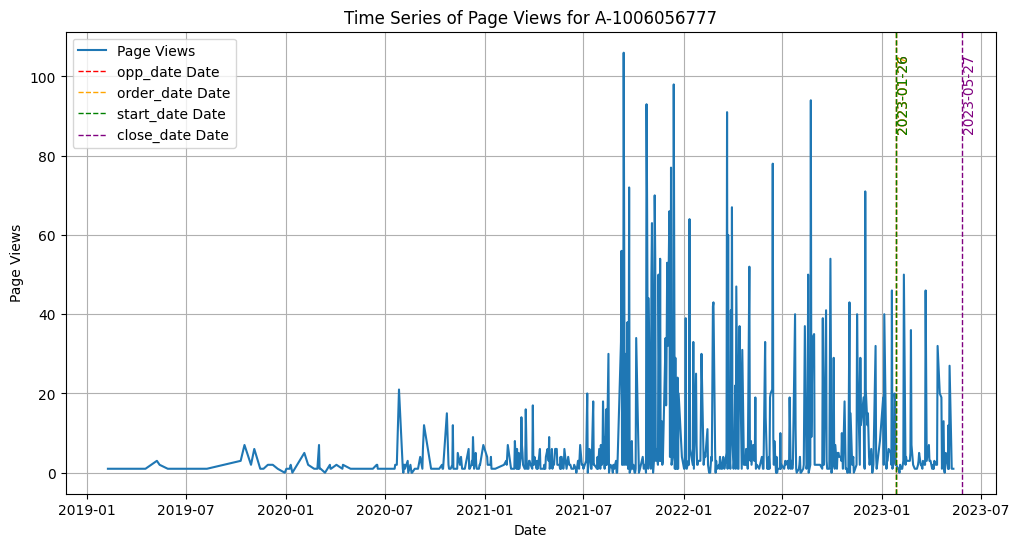

In [116]:
plot_client_data(client2, top5_date, 'A-1006056777')

C:\Users\Sherry\AppData\Local\Temp\ipykernel_23916\1514752611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df['date'] = pd.to_datetime(client_df['date'])  # Ensure the 'date' column is datetime type


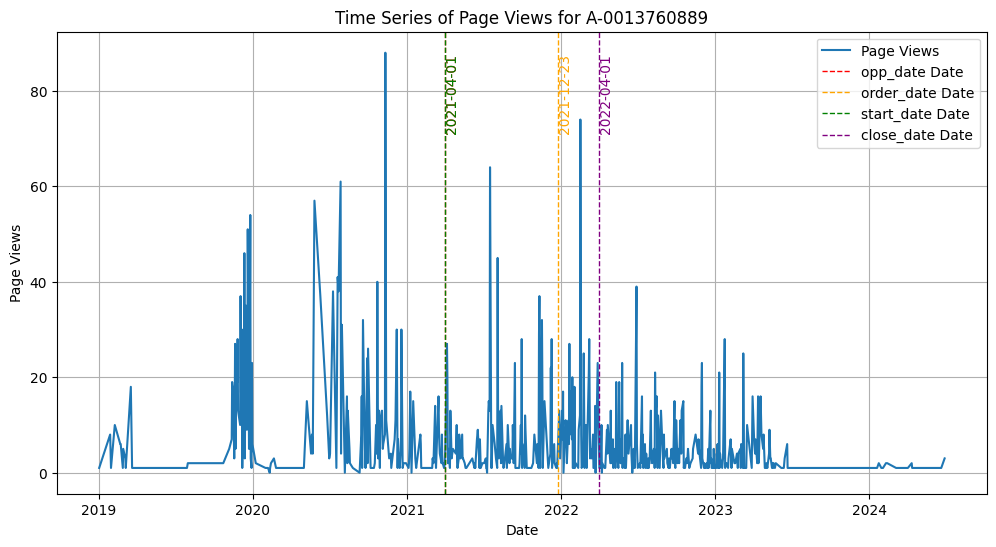

In [117]:
plot_client_data(client3, top5_date, 'A-0013760889')

C:\Users\Sherry\AppData\Local\Temp\ipykernel_23916\1514752611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df['date'] = pd.to_datetime(client_df['date'])  # Ensure the 'date' column is datetime type


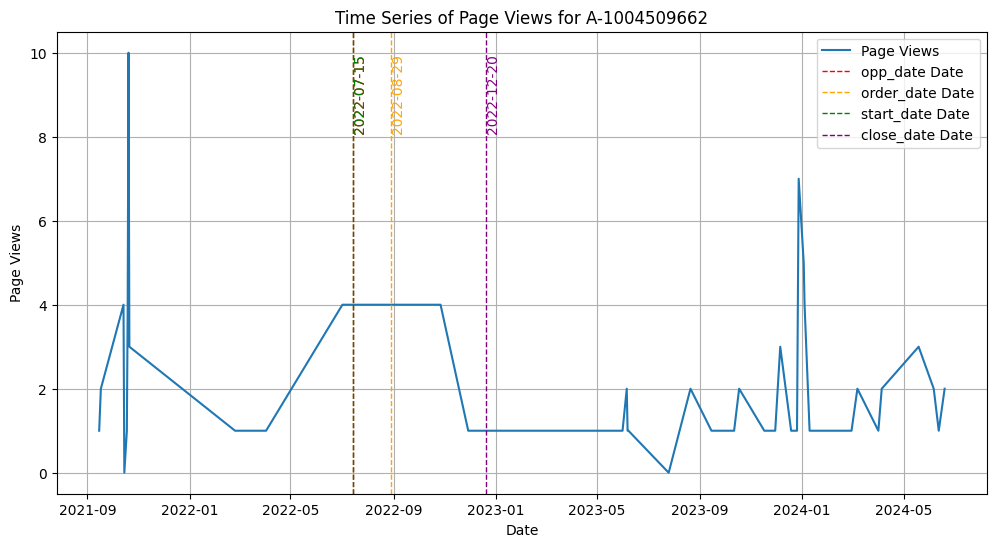

In [118]:
plot_client_data(client4, top5_date, 'A-1004509662')

C:\Users\Sherry\AppData\Local\Temp\ipykernel_23916\1514752611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df['date'] = pd.to_datetime(client_df['date'])  # Ensure the 'date' column is datetime type


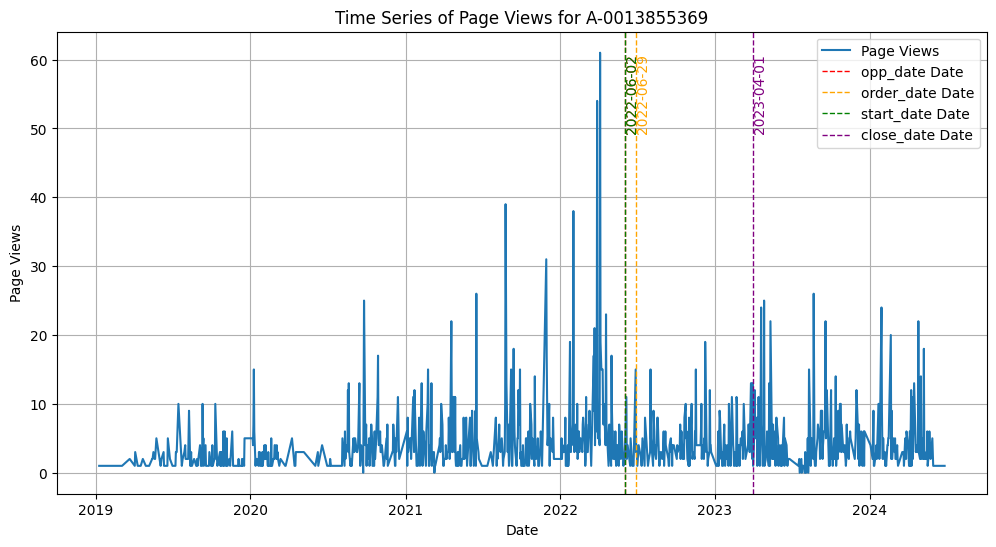

In [119]:
plot_client_data(client5, top5_date, 'A-0013855369')